In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/S02-hw-dataset.csv")

In [3]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [6]:
df.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [8]:
print(f"Количество дублей: {len(df[df.duplicated()])}")

Количество дублей: 1


In [12]:
# 1. Проверка на отрицательные значения в полях, где они не должны встречаться
suspicious_negative = df[(df['age'] < 0) | (df['purchases'] < 0) | (df['revenue'] < 0)]






In [13]:
# 2. Проверка на нереалистичные значения
suspicious_age = df[df['age'] > 100]
suspicious_zero_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]


In [14]:
# 3. Логические противоречия
suspicious_logical_issues = df[df['purchases'] > df['revenue']]


In [16]:
suspicious_records = pd.concat([suspicious_negative, suspicious_age, suspicious_zero_revenue, suspicious_logical_issues]).drop_duplicates()

suspicious_records

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


Пользователь с user_id 6 имеет отрицательное количество покупок.

Пользователь с user_id 11 имеет 4 покупки, но нулевой доход (revenue = 0), что также выглядит нелогично.

In [17]:
country_counts = df['country'].value_counts()

bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_stats = df.groupby('age_group')[['purchases', 'revenue']].agg(['mean', 'sum'])

country_counts, age_group_stats


/tmp/ipython-input-313233241.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')[['purchases', 'revenue']].agg(['mean', 'sum'])


(country
 RU    13
 FR    12
 US     8
 DE     6
 CN     2
 Name: count, dtype: int64,
           purchases          revenue       
                mean sum         mean    sum
 age_group                                  
 0-18       8.000000   8  1488.000000   1488
 19-30      4.428571  62   604.000000   8456
 31-40      6.000000  66  1216.272727  13379
 41-50      3.000000  18   668.000000   4008
 51-60      5.000000  30   596.666667   3580
 61+             NaN   0          NaN      0)

Основные наблюдения:

Наибольшее количество пользователей в датасете из России (RU) — 13 пользователей, за ними идут Франция (FR) с 12 пользователями и США (US) с 8. Меньше всего пользователей из Китая (CN) — 2.

Группа 0-18 лет демонстрирует очень высокий средний доход на покупку (1488), хотя их суммарные покупки минимальны (8).

Группа 19-30 лет имеет среднее значение покупок 4.43 с более низким средним доходом (604).

В группе 31-40 лет наблюдается значительный рост как по среднему числу покупок (6), так и по доходу (1216).

Для старших возрастных групп наблюдается снижение как по количеству покупок, так и по доходам.

В группе 61+ нет пользователей, что могло бы указывать на необходимость дополнительной проверки на корректность данных в этой возрастной категории.


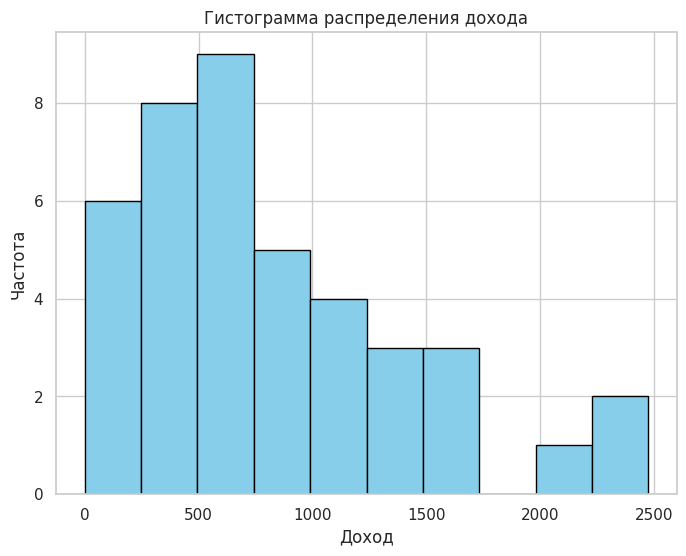

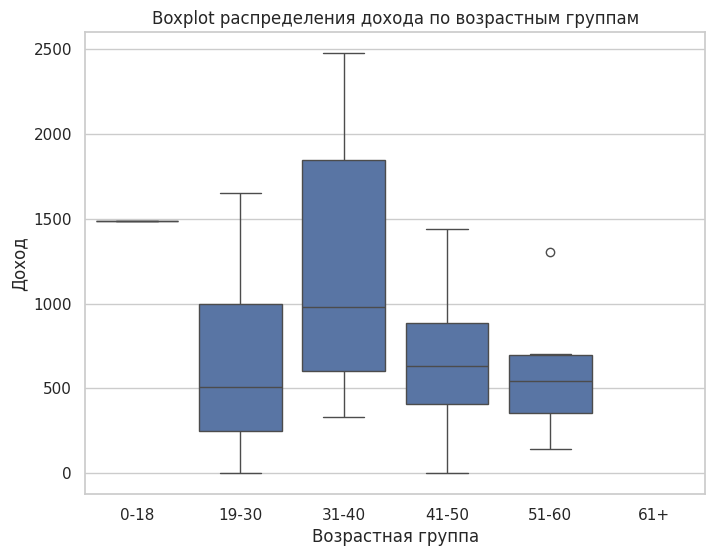

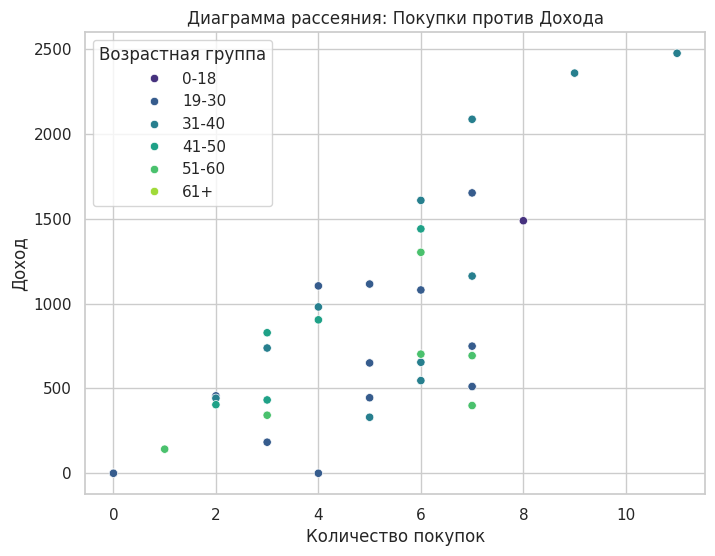

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
plt.hist(df['revenue'], bins=10, edgecolor='black', color='skyblue')
plt.title('Гистограмма распределения дохода')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(True)

# Сохраним гистограмму
plt.savefig('figures/revenue_histogram.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='revenue', data=df)
plt.title('Boxplot распределения дохода по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доход')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='purchases', y='revenue', data=df, hue='age_group', palette='viridis')
plt.title('Диаграмма рассеяния: Покупки против Дохода')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.legend(title='Возрастная группа')
plt.show()


На графиках показаны различные аспекты данных о покупках и доходах, сгруппированные по возрастным категориям.

Гистограмма распределения дохода:

Гистограмма отображает частотное распределение значений дохода. Наибольшая концентрация доходов находится в интервале от 0 до 500, а с увеличением дохода частота резко снижается. Это говорит о том, что большинство пользователей имеют относительно низкий доход.

Boxplot распределения дохода по возрастным группам:

Этот график показывает распределение дохода для различных возрастных категорий. Мы видим, что возрастная группа 31-40 лет имеет самый высокий медианный доход и значительно более широкое распределение, что указывает на разнообразие доходов в этой группе. В других возрастных группах доходы значительно ниже, а группы 61+ и 0-18 лет демонстрируют минимальные доходы и, вероятно, меньшее количество данных для анализа.

Диаграмма рассеяния: Покупки против Дохода:

Этот график показывает зависимость между количеством покупок и доходом для различных возрастных групп. Из данных видно, что пользователи старших возрастных групп (например, 41-50 и 51-60 лет) имеют большее количество покупок и более высокие доходы, в то время как в возрастных группах 0-18 и 61+ наблюдается несколько меньшая активность в обоих аспектах (покупки и доход).